In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read in the circuits data, which has information of each circuit that has been used in Formula 1. For our purposes, we are most interested in the *country* and *circuitId* fields.

In [3]:
circuits = pd.read_csv('./data/circuits.csv')
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,\N,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,\N,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,\N,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,\N,http://en.wikipedia.org/wiki/Istanbul_Park


Now read in the races data which has information on all of the races that have been run in formula one. We will he able to join this dataset with the circuits dataset using the *circuitId* field.

Let's also check how many races there are in this dataset, as this information will be useful for checking that we have all the races when we merge this data with the circuits data.

In [27]:
races = pd.read_csv('./data/races.csv')
print(races.shape)
races.head()

(1035, 8)


,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


We will join the two dataframes using Pandas' merge method, using the default 'inner' merge. An inner merge is similar to SQL's inner join, in that it joins the data based on the intersection of keys. That is, a row is kept, if its joining key (on this occasion *circuitId*), is present in both dataframes.

See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html for more details.

We see that there are still 1035 rows after the merge, so we can be confident that no records have been lost in the process.

In [26]:
grand_prix = races.merge(circuits, on='circuitId')
print(grand_prix.shape)
grand_prix.head()

(1035, 16)


,raceId,year,round,circuitId,name_x,date,time,url_x,circuitRef,name_y,location,country,lat,lng,alt,url_y
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,18,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,36,2007,1,1,Australian Grand Prix,2007-03-18,03:00:00,http://en.wikipedia.org/wiki/2007_Australian_G...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,55,2006,3,1,Australian Grand Prix,2006-04-02,14:00:00,http://en.wikipedia.org/wiki/2006_Australian_G...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,71,2005,1,1,Australian Grand Prix,2005-03-06,14:00:00,http://en.wikipedia.org/wiki/2005_Australian_G...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


We are only interested in the number of grand prix races for each country, so let's group the data by the country column and apply a count to this grouping. We then clean up the dataframe before writing it to a CSV file.

The below shows the first ten entries that will appear in the CSV file.

In [20]:
gp_counts = grand_prix.groupby(by=['country']).count().reset_index()
gp_counts = gp_counts[['country', 'raceId']]
gp_counts = gp_counts.rename(columns={'raceId': 'count'}).sort_values(['count'], ascending=False)
gp_counts.to_csv('./data/gps_by_country.csv', index=False)
gp_counts.head(10)

,country,count
13,Italy,100
10,Germany,79
30,UK,75
31,USA,70
18,Monaco,66
5,Belgium,65
9,France,61
25,Spain,57
7,Canada,50
6,Brazil,47


Lastly, let's have a quick look at what the data might look like in a horizontal plot.

It looks a little overcrowded, y-axis, so we will need to be careful when plotting that in d3, but overall I think this is acceptable.

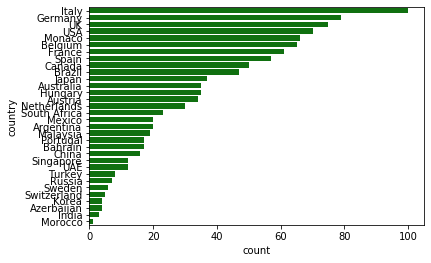

In [25]:
sns.barplot(x="count", y="country", data=gp_counts, label="Total", color="g")
plt.show()